# Métriques de régression

Quelles différences entre MAE, MSE, R² etc.

Pour mesurer la performance d'un modèle il faut mesurer les erreurs entre les valeurs vraies et les prédictions

![Alt text](assets/metriques_regression1.png)


## MSE
$$Err_{Quadratique} = (y_{vrai} - y_{pred})^2$$
* Ensuite on fait la moyenne de toutes ces erreurs
* Erreur Quadratique Moyenne - MSE - Mean Squared Error
$$MSE = \frac{1}{m}\sum(y_{vrai} - y_{pred})^2$$

## MAE
* Si on fait la moyenne des erreurs absolue
* Erreur Absolue Moyenne - MAE - Mean Absolute Error
$$MSE = \frac{1}{m}\sum |y_{vrai} - y_{pred}|$$


Dans sklearn il faut les charger depuis le module "metrics"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import *

In [5]:
y = np.array([1])
y_pred = np.array([1])

print(f"MAE = {mean_absolute_error(y, y_pred)}")
print(f"MSE = {mean_squared_error(y, y_pred)}")

MAE = 0.0
MSE = 0.0


In [6]:
y = np.array([1])
y_pred = np.array([2])

print(f"MAE = {mean_absolute_error(y, y_pred)}")
print(f"MSE = {mean_squared_error(y, y_pred)}")

MAE = 1.0
MSE = 1.0


In [7]:
y = np.array([1])
y_pred = np.array([3])

print(f"MAE = {mean_absolute_error(y, y_pred)}")
print(f"MSE = {mean_squared_error(y, y_pred)}")

MAE = 2.0
MSE = 4.0


In [8]:
y = np.array([1])
y_pred = np.array([4])

print(f"MAE = {mean_absolute_error(y, y_pred)}")
print(f"MSE = {mean_squared_error(y, y_pred)}")

MAE = 3.0
MSE = 9.0


* On pourrait penser que l'erreur quadratique moyenne c'est le carré de l'erreur absolue moyenne
* Non !
* $\sum (err)^2 \neq (\sum (err))^2$
* MSE != MAE²

In [9]:
y = np.array([1, 2])
y_pred = np.array([5, 2])

print(f"MAE = {mean_absolute_error(y, y_pred)}")
print(f"MSE = {mean_squared_error(y, y_pred)}")

MAE = 2.0
MSE = 8.0


* Dans le cas précédent on a pas d'erreur sur la seconde valeur
* On voit bien que 8 c'est pas le carré de 2 

In [11]:
y = np.array([1, 2])
y_pred = np.array([5, 2])

print(f"MAE  = {mean_absolute_error(y, y_pred)}")
print(f"RMSE = {np.sqrt(mean_squared_error(y, y_pred))}")

MAE       = 2.0
sqrt(MSE) = 2.8284271247461903


## RMSE
* La racine carré de la MSE
* Comme l'ecart type (à la variance), RMSE permet de retrouver les unités de la MAE 
* Ce qui permet de les comparer 

On a MAE = 2 et RMSE = 2.8. 

### Quand utiliser l'une ou l'autre ? 
* On utilise la RMSE quand on accorde une grande importance aux grandes erreurs
* La RMSE pénalise beaucoup plus les grandes erreurs que la MAE
* Peut être critique lors du réglage des hyper paramètres avec GridSearchCV()
* On utilise la MAE quand l'importance d'une erreur est linéaire avec son amplitude. Si le Dataset contient de valeurs aberrantes (outliers)

![Alt text](assets/metriques_regression2.png)

## Median Absolute Error 
* Encore moins sensible aux grandes erreurs
* $MAE = median(|y_{vrai} - y_{pred}|)$


In [13]:
y = np.array([1, 2, 2, 3, 5, 2])
y_pred = np.array([5, 2, 2, 5, 7, 1000])

print(f"MAE                 = {mean_absolute_error(y, y_pred)}")
print(f"RMSE                = {np.sqrt(mean_squared_error(y, y_pred))}")
print(f"Median Absolute Err = {median_absolute_error(y, y_pred)}")

MAE                 = 167.66666666666666
RMSE                = 407.43670265044443
Median Absolute Err = 2.0


* MAE et RMSE peuvent laisser penser que le modèle fait de très grandes erreurs
* En fait le modèle ne fait pas beaucoup de grande erreurs mais il en fait une seule
* Attention toutefois car si généralement le modèle fait pet d'erreur il peut lui arriver de faire une grande erreur. Autrement dit le risque d'utiliser le modèle n'est pas vraiment la valeur de la median absolute error




## MAE, MSE, RMSE, Médiane ABS Err...
* Laquelle utiliser ?
* Toutes ! Sous réserve de bien les comprendre
* On peut aussi regarder les quintile, la distribution des err
* On peut déterminer des intervalles de confiance : le modèle à 5% de chance de faire une erreur supérieure à 1000 €

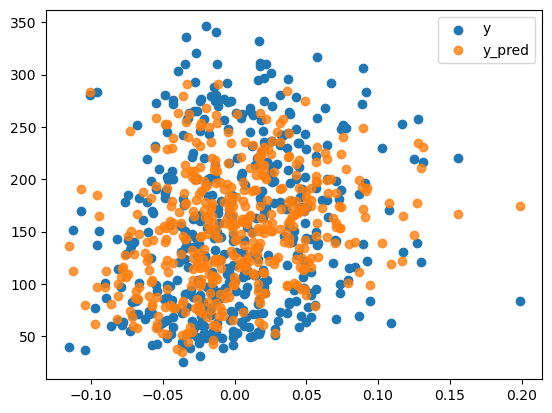

In [20]:
from sklearn.datasets import load_diabetes # boston n'est plus dispo
from sklearn.linear_model import LinearRegression

boston = load_diabetes()
X = boston.data
y = boston.target

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.scatter(X[:,5], y, label="y")
plt.scatter(X[:,5], y_pred, alpha=0.8, label="y_pred")
plt.legend()



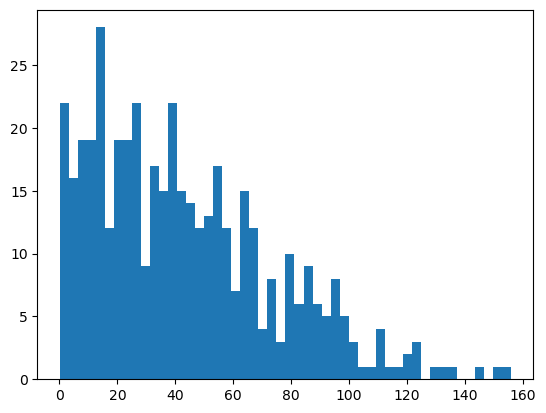

In [18]:
err_hist = np.abs(y - y_pred)
plt.hist(err_hist, bins=50)
plt.show()

 * Cela permet de voir comment se répartissent les erreurs
 * On a une distribution exponnetielle des erreurs

## Coefficient de détermination - R²

* R² est retourné par la fonction score(X, y) des modèles de régression
* LinearRegression, KNeighborsRegressor, SVR, MLPRegressor
* Si R²=1 c'est bon. Si R²=0 
* $R^2 = 1 - \frac{\sum(y_{vrai} - y_{pred})^2}{\sum(y_{vrai} - \overline{y_{vrai}})^2}$
* R² évalue la performance du modèle par rapport au niveau de variation présent dans les données
* C'est bien le rapport entre l'erreur quadratique et la variance
* $R^2 = 1 - \frac{MSE}{Variance}$
* Si R² proche de 1 alors les erreurs << variance
* Si R² proche de 0 alors le niveau de variation des erreurs est aussi grand que le niveau de variation des données
* On peut même avoir un R² négatif si les erreurs sont plus grandes que le niveau de variation des données




In [21]:
from sklearn.datasets import load_diabetes # boston n'est plus dispo
from sklearn.linear_model import LinearRegression

boston = load_diabetes()
X = boston.data
y = boston.target

model = LinearRegression()
model.fit(X, y)
model.score(X, y)

0.5177484222203498

* On a un R² qui vaut 51%
* Le modèle ne décrit qu'à 51% les données étudiées

In [23]:
from sklearn.datasets import load_diabetes # boston n'est plus dispo
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

boston = load_diabetes()
X = boston.data
y = boston.target

model = LinearRegression()
model.fit(X, y)
model.score(X, y)

# scoring peut être trouvé ici : https://scikit-learn.org/stable/modules/model_evaluation.html
# On peut aussi saisir n'importe quoi, lancer, sortir en erreur et récupérer la chaine dans le message d'erreur
# {'neg_mean_poisson_deviance', 'f1_micro', 'max_error', 'neg_log_loss', 'positive_likelihood_ratio', 
# 'neg_mean_absolute_error', 'precision', 'adjusted_rand_score', 'roc_auc_ovr_weighted', 'recall_macro', 
# 'neg_mean_absolute_percentage_error', 'jaccard', 'neg_root_mean_squared_error', 'adjusted_mutual_info_score', 
# 'f1_weighted', 'neg_negative_likelihood_ratio', 'precision_macro', 'precision_samples', 
# 'fowlkes_mallows_score', 'jaccard_weighted', 'f1_macro', 'precision_weighted', 'accuracy', 
# 'completeness_score', 'homogeneity_score', 'roc_auc_ovo', 'f1', 'jaccard_samples', 'neg_brier_score', 
# 'roc_auc_ovo_weighted', 'recall_samples', 'neg_mean_squared_log_error', 'jaccard_macro', 'top_k_accuracy', 
# 'rand_score', 'jaccard_micro', 'neg_median_absolute_error', 'recall_micro', 'r2', 'matthews_corrcoef', 
# 'roc_auc', 'roc_auc_ovr', 'balanced_accuracy', 'precision_micro', 'recall_weighted', 'average_precision', 
# 'mutual_info_score', 'v_measure_score', 'normalized_mutual_info_score', 'neg_mean_squared_error', 
# 'explained_variance', 'recall', 'neg_mean_gamma_deviance', 'f1_samples'}

# Là on prend neg_mean_absolute_error
cross_val_score(LinearRegression(), X, y, cv=3, scoring="neg_mean_absolute_error")

# Utilisable dans les autres fonctions qui utilisent la cross validation (GridSearchCV() par exemple)

array([-45.41229694, -46.79555815, -41.35781663])